In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd

In [36]:
digits_mnist = tf.keras.datasets.mnist.load_data()

In [37]:
((x_train, y_train),(x_test, y_test)) = digits_mnist

# Alegem un numar pentru a fi generat

In [38]:
NR_DE_GENERAT = 7

In [39]:



imaginile_cu_nr_7 = x_train[y_train == NR_DE_GENERAT]
imaginile_cu_nr_7.shape


(6265, 28, 28)

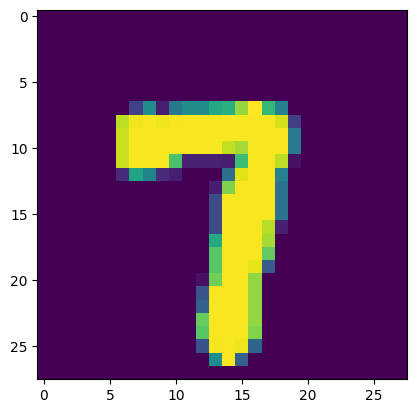

In [40]:
plt.imshow(imaginile_cu_nr_7[324])

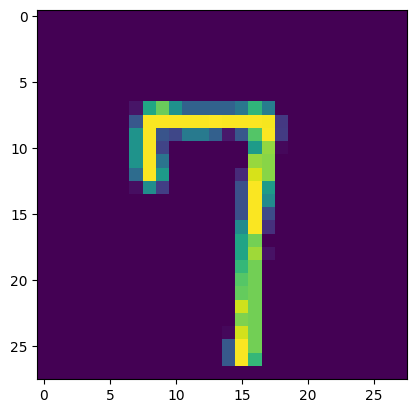

In [41]:
plt.imshow(imaginile_cu_nr_7[3145])

In [42]:
generator = tf.keras.Sequential([ ])
dicriminator = tf.keras.Sequential([ ])

# Pas 1 - creare de discrimatoru pt clasificare de imagini

In [43]:
generator = tf.keras.Sequential([ ])
dicriminator = tf.keras.Sequential([

                        ## Fully connected
        tf.keras.layers.Flatten(), # 28 * 28
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2), # 20% din neuroni sunt dezactivati random
        tf.keras.layers.Dense(64, activation='relu'),

        tf.keras.layers.Dense(1, activation='sigmoid') #


])

# Pas 2 - creare generatorului in oglinda cu discriminatorul

In [44]:
generator = tf.keras.Sequential([

         tf.keras.layers.Dense(64, activation='relu'),
         tf.keras.layers.Dense(128, activation='relu'),

         tf.keras.layers.Dense(28 * 28, activation='sigmoid'),
         tf.keras.layers.Reshape((28, 28))
])
dicriminator = tf.keras.Sequential([

                        ## Fully connected
        tf.keras.layers.Flatten(), # 28 * 28
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2), # 20% din neuroni sunt dezactivati random
        tf.keras.layers.Dense(64, activation='relu'),

        tf.keras.layers.Dense(1, activation='sigmoid') #


])

# Pas 3 - compile (dicriminator) - zice daca e bine sau nu (binary - binary_crossentropy)

In [45]:
dicriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Pas 4 - Crearea GAN-ului (Generative Adversarial Network`)

In [46]:
GAN = tf.keras.Sequential([  generator, dicriminator ])


In [47]:
dicriminator.trainable = False

In [48]:
GAN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
GAN.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_12 (Sequential)      │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
GAN.layers

[<Sequential name=sequential_11, built=False>,
 <Sequential name=sequential_12, built=False>]

In [51]:
GAN.layers[0]

<Sequential name=sequential_11, built=False>

In [52]:
GAN.layers[0].summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Imaginilea de antrenament

In [53]:
imaginile_cu_nr_7.shape, type(imaginile_cu_nr_7)

((6265, 28, 28), numpy.ndarray)

In [54]:
batch_size = 32

In [55]:
train_dataset = tf.data.Dataset.from_tensor_slices(imaginile_cu_nr_7)
train_dataset, type(train_dataset)

(<_TensorSliceDataset element_spec=TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None)>,
 tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset)

In [56]:
new_dataset = train_dataset.batch(batch_size=32, drop_remainder=True).prefetch(1)
new_dataset, type(new_dataset)

(<_PrefetchDataset element_spec=TensorSpec(shape=(32, 28, 28), dtype=tf.uint8, name=None)>,
 tensorflow.python.data.ops.prefetch_op._PrefetchDataset)

In [57]:
EPOCHS = 50

for epoch in range(EPOCHS):
    print(f'Epoch {epoch+1}/{EPOCHS}')
    for batch in new_dataset:
      noise = tf.random.normal([batch_size, 100])
      fake_images = generator(noise)


      x_fake_and_real = tf.concat([fake_images, tf.dtypes.cast(batch, tf.float32)], axis=0)
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)

      dicriminator.trainable = True
      dicriminator.train_on_batch(x_fake_and_real, y1)
      dicriminator.trainable = False

      noise = tf.random.normal([batch_size, 100])
      y2 = tf.constant([[1.]] * batch_size)
      GAN.train_on_batch(noise, y2)




Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [58]:
noise = tf.random.normal(shape=(10, 100))


generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([10, 28, 28])

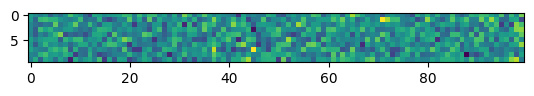

In [62]:
plt.imshow(noise)

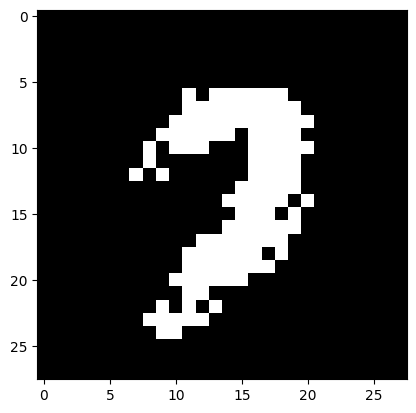

In [59]:
plt.imshow(generated_image[0], cmap='gray')

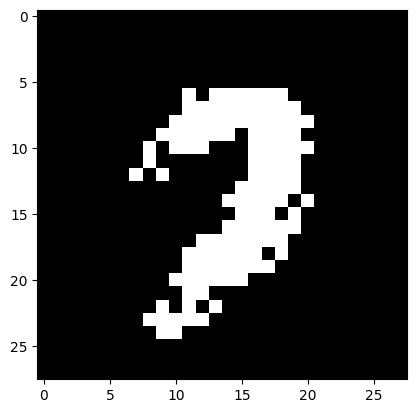

In [60]:
plt.imshow(generated_image[1], cmap='gray')

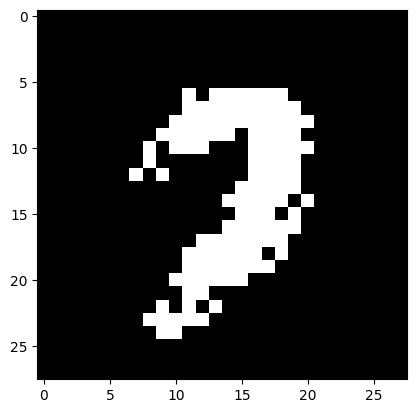

In [61]:
plt.imshow(generated_image[2], cmap='gray')